In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as fit
from ast import literal_eval

from importlib import reload
from tblib import lattice
from tblib import hamiltonian

reload(lattice)
reload(hamiltonian)

<module 'tblib.hamiltonian' from 'c:\\Users\\atsch\\Desktop\\MasterVorlesungen\\Masterthesis\\Code\\tblib\\hamiltonian.py'>

In [3]:
sfwtab = pd.read_csv(r'datafiles\SFWvsT\sfw_T_0-0c2_U_0_nu_eq_3', index_col=0)


In [4]:
#sfwtab = pd.concat((sfwtab_5,sfwtab_6, sfwtab_7), ignore_index=True)
#sfwtab=sfwtab_7



In [5]:
sfwtab.head()

,U,T,mu,nu,sq_det_SFW,SFW_ten,SFWxx,SFWxy,delta,ns,deltaError,nError
0,0.00001,0.000000,(-4.999140328220614e-06-1.1685497113267659e-26j),(2.9998486890706713-3.857418842833829e-21j),(3.8942290883911865e-06+7.48766038678376e-24j),[[-3.89422909e-06-7.52927571e-24j 6.06048523e...,(-3.89422908839095e-06-7.529275712787935e-24j),(6.060485234775607e-19+6.422908296519248e-27j),[(-3.978818078227693e-07-2.290267665768152e-16...,"[(0.999999999897293-3.857511372134804e-21j), (...",5.567009e-09,0.000095
1,0.00001,0.005882,(-3.974240182850377e-06-1.141056017816326e-25j),(2.9999128363457643+7.607343514748635e-20j),(8.123373126875089e-36-3.337958958104444e-36j),[[-1.14928982e-35+5.68347724e-36j 8.77132363e...,(-1.1492898219216343e-35+5.6834772375669006e-36j),(8.77132362904933e-36-4.489694284329397e-37j),[(2.6846517981057898e-20+3.81483926312014e-24j...,"[(0.9999999999306384+1.781274519722275e-19j), ...",1.770706e-17,0.000080
2,0.00001,0.011765,(-6.70773709342344e-06-8.731277008036044e-25j),(3.000072568170373+6.034883912057144e-19j),(1.6377712905358263e-38+8.508511861051724e-42j),[[-1.13890809e-38-1.01516665e-41j 6.56833571e...,(-1.1389080854816067e-38-1.0151666516905277e-41j),(6.568335711307038e-39-2.8355093261290487e-41j),[(1.34402344312604e-19+7.775282847375835e-23j)...,"[(1.0000000001269258+9.745823692891511e-20j), ...",2.700340e-18,0.000066
3,0.00001,0.017647,(-2.154866121953125e-06-3.8858827609696286e-25j),(2.999919392568155-4.24667415961275e-20j),(2.0826484742288917e-38-4.644530643462049e-41j),[[-3.40877388e-38+7.91319585e-41j 4.18496382e...,(-3.408773880747081e-38+7.913195853475219e-41j),(4.184963816895108e-40-2.3894294678283884e-39j),[(6.712167780360561e-19-1.3357598665015632e-22...,"[(0.9999999982864016-1.1862278623304369e-19j),...",1.375998e-17,0.000074
4,0.00001,0.023529,(-9.740947137632006e-06+3.9781995232760375e-25j),(3.0001007565824223-6.598523135466269e-20j),(1.4002744440643377e-42+5.4667939554113745e-40j),[[-4.86402759e-40+1.38560373e-44j -7.35316943e...,(-4.864027593946021e-40+1.3856037303701616e-44j),(-7.353169429675768e-40-4.2690618955330626e-42j),[(3.3564667687762033e-18-3.6219980680305916e-2...,"[(1.0000000095548813-8.382023204038838e-20j), ...",7.067527e-17,0.000092


In [6]:
U = np.array(sfwtab.U)
T = np.array(sfwtab['T'])
mu=np.array(sfwtab.mu, dtype=complex)
nu = np.array(sfwtab.nu, dtype=complex)
sdsfw = np.array(sfwtab.sq_det_SFW, dtype=complex)
sfwxx = np.array(sfwtab.SFWxx, dtype=complex)


In [7]:
xarr = np.array(sfwtab.U.loc[sfwtab.mu==sfwtab.mu.iloc[0]])
yarr = np.array(sfwtab.nu.loc[sfwtab.mu==sfwtab.mu.iloc[0]], dtype=complex)

C:\Users\atsch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\axes\_axes.py:4347: ComplexWarning: Casting complex values to real discards the imaginary part
  c = np.asanyarray(c, dtype=float)


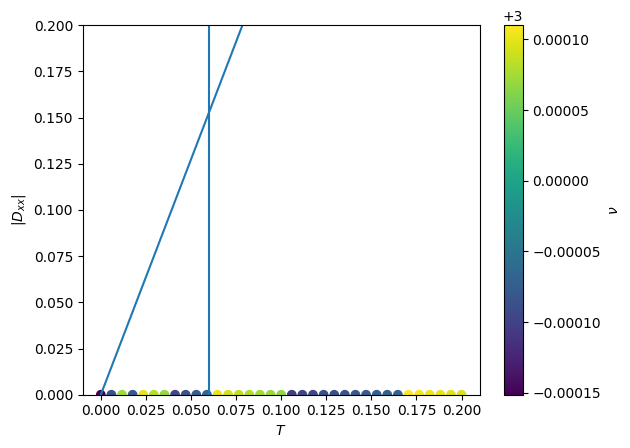

In [8]:
plt.xlabel(r'$T$')
plt.ylabel(r'$|D_{xx}|$')
plt.ylim(0,0.2)
#plt.xlim(0,15)
plt.scatter(T[0:], np.abs(sfwxx[0:]), c=nu[0:])
plt.plot(T, T*8/np.pi)
plt.vlines(0.06, 0, 0.2)
plt.colorbar(label=r'$\nu$')

In [ ]:
sfwtab['T'].loc[(np.abs(complex(sfwtab.sq_det_SFW)-sfwtab['T']*8/np.pi)<1e-3)]

TypeError: unsupported operand type(s) for -: 'str' and 'float'

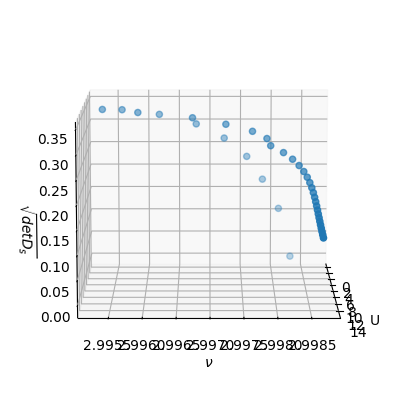

In [36]:
fig = plt.figure(figsize=(5,15))
ax = fig.add_subplot(projection='3d')

ax.scatter(U,np.real(nu), np.real(sdsfw), marker='o')

ax.set_xlabel('U')
ax.set_ylabel(r'$\nu$')
ax.set_zlabel(r'$\sqrt{det D_s}$')
ax.view_init(elev=10, azim=0, roll=0)

plt.show()